In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [3]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일
0        2023-02-13     150   ST-1517   ST-1517      1        1        50   0
1        2023-02-13     835   ST-1718   ST-1718      1        1        10   0
2        2023-02-13    1250   ST-2028   ST-2028      1        1        20   0
3        2023-02-13    1815   ST-1506   ST-1506      1        1        10   0
4        2023-02-13    1845   ST-2045   ST-2045      1        1        20   0
...             ...     ...       ...       ...    ...      ...       ...  ..
2345644  2023-12-18    2355   ST-2041   ST-1714      1        5      1020   0
2345645  2023-12-18    2355   ST-1062   ST-1647      1        8      1070   0
2345646  2023-12-18    2355    ST-975    ST-514      1       46      1257   0
2345647  2023-12-18    2355   ST-2871    ST-508      1       13      2246   0
2345648  2023-12-18    2355   ST-2871   ST-1065      1        6       992   0

[2345649 rows x 8 columns]


In [4]:
print(강서_데이터.info())
print(강서_대여소_ID.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345649 entries, 0 to 2345648
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준_날짜      object
 1   기준_시간대     int64 
 2   시작_대여소_ID  object
 3   종료_대여소_ID  object
 4   전체_건수      int64 
 5   전체_이용_분    int64 
 6   전체_이용_거리   int64 
 7   요일         int64 
dtypes: int64(5), object(3)
memory usage: 143.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소_ID  224 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB
None


# 일별 대여데이터 시각화

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3

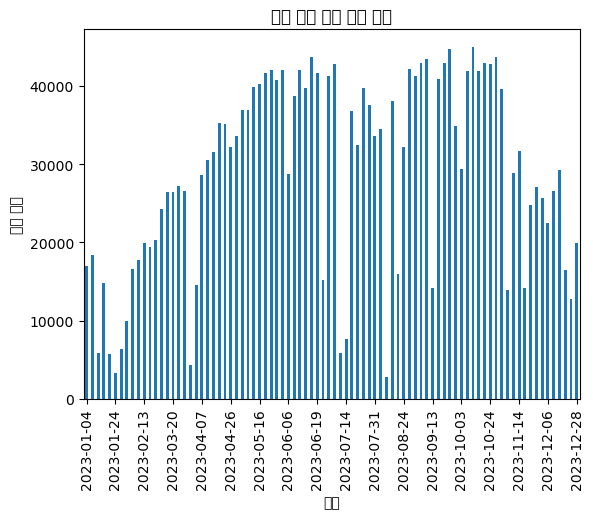

In [5]:
일별_데이터 = 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

눈금_간격 = 5  # 예시로 눈금 간격을 5로 설정
눈금_위치 = range(0, len(일별_데이터.index), 눈금_간격)
눈금_레이블 = 일별_데이터.index[::눈금_간격]

# 시작 대여소별 대여 건수 시각화
일별_데이터.plot(kind='bar')
plt.title('강서 지역 일별 대여 건수')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.xticks(눈금_위치, 눈금_레이블, rotation=90)
plt.show()




# 시간별 데이터 시각화

In [6]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00'
    elif time < 1600:
        return '10:00~16:00'
    elif time < 2000:
        return '16:00~20:00'
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()

print(강서_시간대별_건수)

시간대_구간
00:00~06:00    104216
06:00~10:00    639874
10:00~16:00    502497
16:00~20:00    805289
20:00~24:00    439450
Name: 전체_건수, dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\L

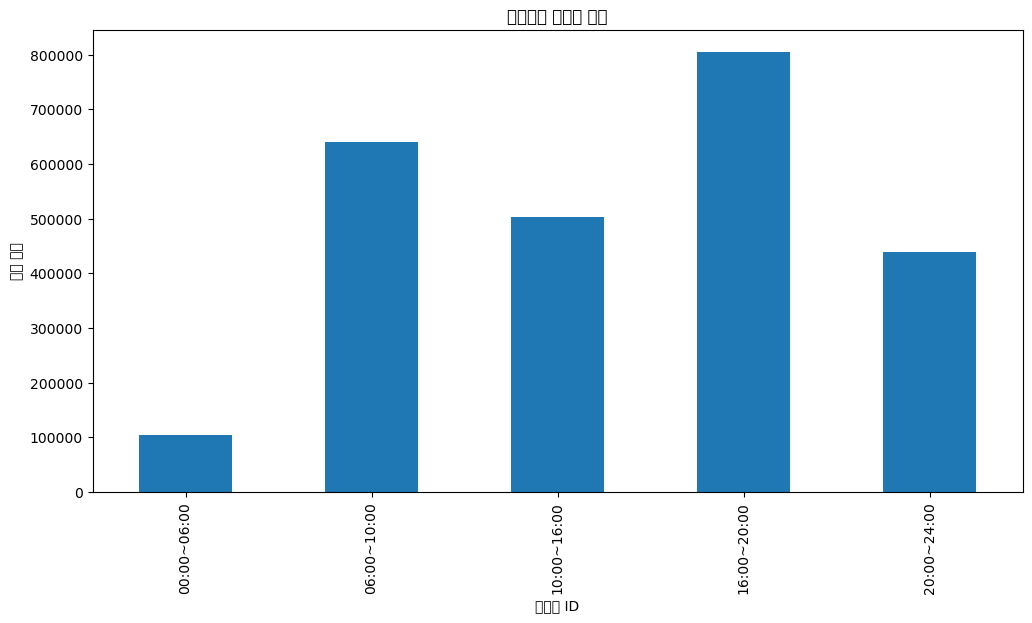

In [7]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

In [13]:
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,시간대_구간
0,2023-02-13,150,ST-1517,ST-1517,1,1,50,0,00:00~06:00
1,2023-02-13,835,ST-1718,ST-1718,1,1,10,0,06:00~10:00
2,2023-02-13,1250,ST-2028,ST-2028,1,1,20,0,10:00~16:00
3,2023-02-13,1815,ST-1506,ST-1506,1,1,10,0,16:00~20:00
4,2023-02-13,1845,ST-2045,ST-2045,1,1,20,0,16:00~20:00
...,...,...,...,...,...,...,...,...,...
2345644,2023-12-18,2355,ST-2041,ST-1714,1,5,1020,0,20:00~24:00
2345645,2023-12-18,2355,ST-1062,ST-1647,1,8,1070,0,20:00~24:00
2345646,2023-12-18,2355,ST-975,ST-514,1,46,1257,0,20:00~24:00
2345647,2023-12-18,2355,ST-2871,ST-508,1,13,2246,0,20:00~24:00


# 대여소 별 대여, 반납 비교

In [8]:
import matplotlib.pyplot as plt

# 시작 대여소별 전체 횟수 계산
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()



In [17]:
len(강서_데이터['시작_대여소_ID'].unique())

194

In [18]:
len(강서_데이터['종료_대여소_ID'].unique())

194

In [34]:
ID_list= 강서_데이터['시작_대여소_ID'].unique()

In [38]:
temp_list = []

for i in range(len(ID_list)):
    temp_list.append(시작대여소별_전체횟수[ID_list[i]])
    
print(temp_list)

[18459, 64404, 5035, 14029, 61295, 36811, 30386, 52873, 28459, 12589, 6280, 15473, 7222, 93455, 12542, 14203, 12412, 9082, 7464, 25693, 20899, 4653, 4411, 22339, 7574, 21919, 21595, 1652, 32795, 16942, 16852, 12236, 10621, 11657, 7210, 3550, 21410, 25487, 5710, 10941, 9184, 15694, 21005, 27015, 921, 26543, 16428, 18056, 17748, 28238, 23667, 20207, 3437, 28431, 11728, 7677, 33880, 20698, 17206, 24591, 18295, 18749, 11480, 20330, 8422, 6630, 13790, 19352, 20822, 32894, 14304, 5073, 9902, 21266, 20896, 14252, 12241, 16272, 4411, 6759, 15154, 8368, 14108, 23566, 6607, 10971, 4920, 9825, 5930, 12558, 10460, 3327, 4529, 6800, 31605, 13912, 6868, 20705, 4348, 9097, 12945, 19266, 3868, 14004, 13284, 6261, 10331, 12205, 3082, 12087, 14729, 15128, 8634, 30423, 8977, 16353, 8382, 7226, 12178, 5313, 9802, 9696, 19294, 7258, 15696, 8510, 7707, 14925, 11263, 9682, 13247, 8248, 9324, 10131, 9562, 10116, 17987, 10166, 5468, 2662, 13346, 2912, 4268, 2884, 18860, 9106, 1546, 8002, 15055, 6652, 6546, 286

In [44]:
st_count = temp_list.copy()

In [46]:
temp_list2 = []

for i in range(len(ID_list)):
    temp_list2.append(종료대여소별_전체횟수[ID_list[i]])
    
print(temp_list2)

[18732, 62668, 1496, 13884, 60164, 36430, 30351, 53134, 28400, 12021, 6118, 15521, 7226, 94069, 12115, 13744, 12374, 8820, 7403, 26167, 20103, 4376, 4405, 23067, 7903, 22415, 20230, 1695, 33289, 17034, 17229, 7788, 10165, 10881, 7257, 2931, 21796, 31364, 6886, 10343, 8886, 15577, 20832, 31595, 1254, 26326, 15277, 18243, 18065, 28477, 23811, 18992, 1954, 28155, 11515, 7476, 33527, 21502, 16765, 26034, 19724, 22309, 10261, 20641, 8009, 6535, 13688, 20634, 20876, 32696, 14611, 3223, 6698, 22731, 20447, 17038, 11749, 16637, 4467, 6398, 13404, 7644, 12936, 23228, 5832, 12131, 4937, 10114, 6187, 12519, 10525, 3682, 5388, 6099, 37191, 13605, 8434, 20551, 4973, 8987, 11662, 19968, 3881, 14108, 13064, 6287, 11162, 10678, 4213, 9701, 10722, 15046, 7211, 30266, 8646, 17036, 6824, 7422, 11829, 5753, 8929, 8839, 21487, 6735, 15963, 8538, 7059, 14572, 10542, 9582, 13591, 8408, 9360, 9754, 9529, 7159, 17802, 10480, 5705, 3139, 13659, 3218, 3231, 2821, 21234, 8845, 1166, 6671, 15369, 8291, 4480, 3654,

In [47]:
en_count = temp_list2.copy()

In [51]:
강서_대여소_정보 = {'대여소_ID' : ID_list, '대여건수' : st_count, '반납건수' : en_count}
강서_대여소_정보 = pd.DataFrame(강서_대여소_정보)

강서_대여소_정보

,대여소_ID,대여건수,반납건수
0,ST-1517,18459,18732
1,ST-1718,64404,62668
2,ST-2028,5035,1496
3,ST-1506,14029,13884
4,ST-2045,61295,60164
...,...,...,...
189,ST-3259,2037,2349
190,ST-3261,1975,1974
191,ST-3263,555,675
192,ST-3276,286,298


In [52]:
강서_대여소_정보['대여-반납'] = 강서_대여소_정보['대여건수'] - 강서_대여소_정보['반납건수']

In [53]:
강서_대여소_정보

,대여소_ID,대여건수,반납건수,대여-반납
0,ST-1517,18459,18732,-273
1,ST-1718,64404,62668,1736
2,ST-2028,5035,1496,3539
3,ST-1506,14029,13884,145
4,ST-2045,61295,60164,1131
...,...,...,...,...
189,ST-3259,2037,2349,-312
190,ST-3261,1975,1974,1
191,ST-3263,555,675,-120
192,ST-3276,286,298,-12


In [60]:
강서_대여소_정보.to_csv('강서_대여소_정보.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_15568\2034366949.py:9: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\2034366949.py:9: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\2034366949.py:9: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\2034366949.py:9: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\2034366949.py:9: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()


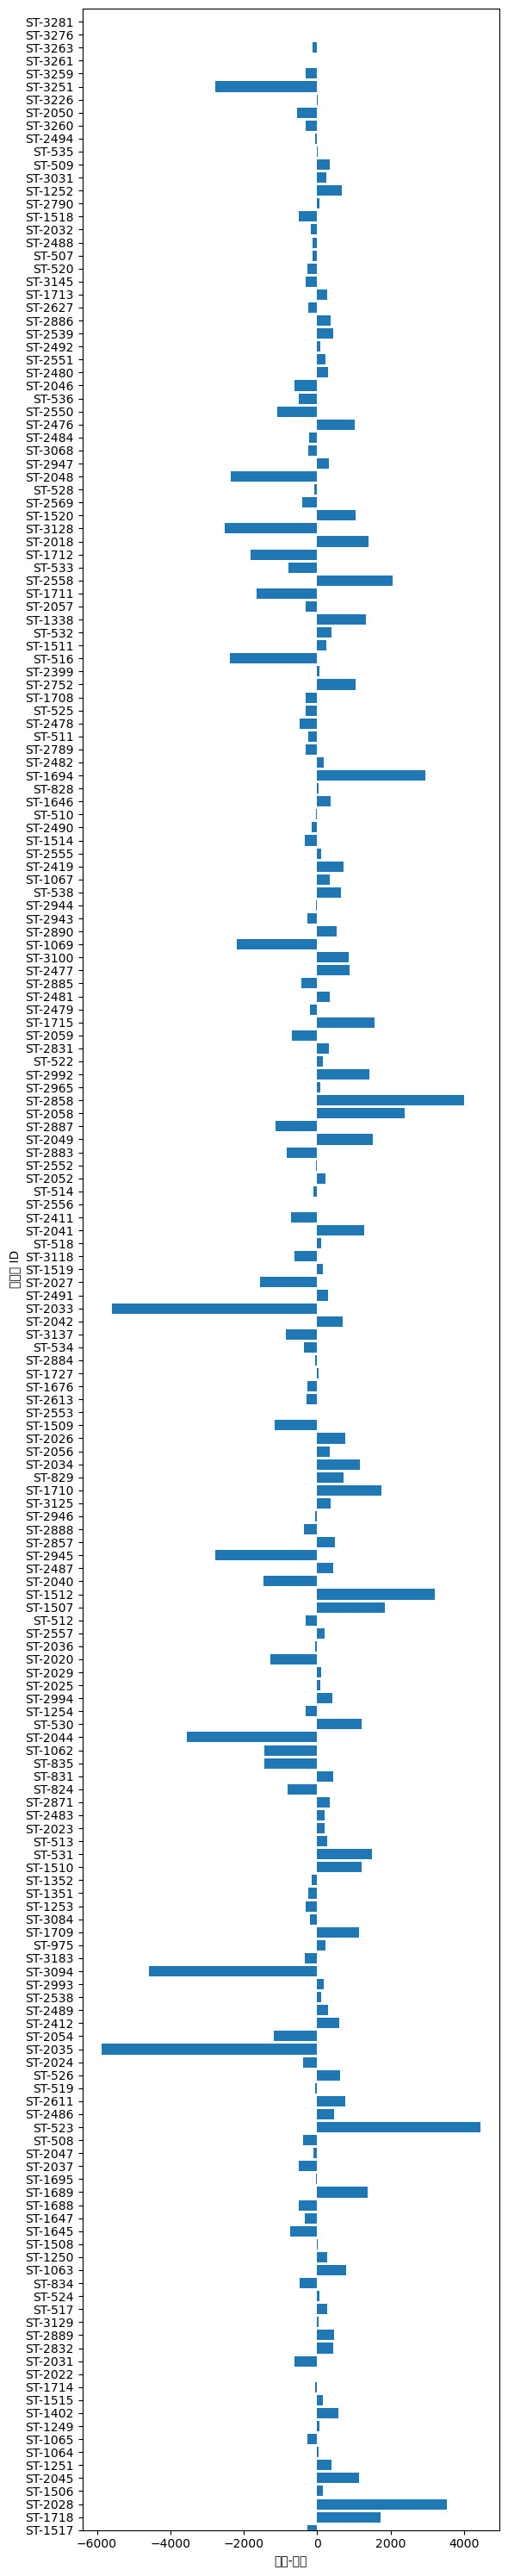

In [71]:
fig, ax = plt.subplots(figsize=(6,30))

plt.barh(강서_대여소_정보['대여소_ID'], 강서_대여소_정보['대여-반납'])
# plt.xticks(rotation=90)
plt.ylabel('대여소 ID')
plt.xlabel('대여-반납')
plt.ylim(0, 194)

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15568\1371116159.py:20: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\1371116159.py:20: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\1371116159.py:20: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\1371116159.py:20: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\1371116159.py:20: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_15568\1371116159.py:20: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  plt.tight_layout()
C:\U

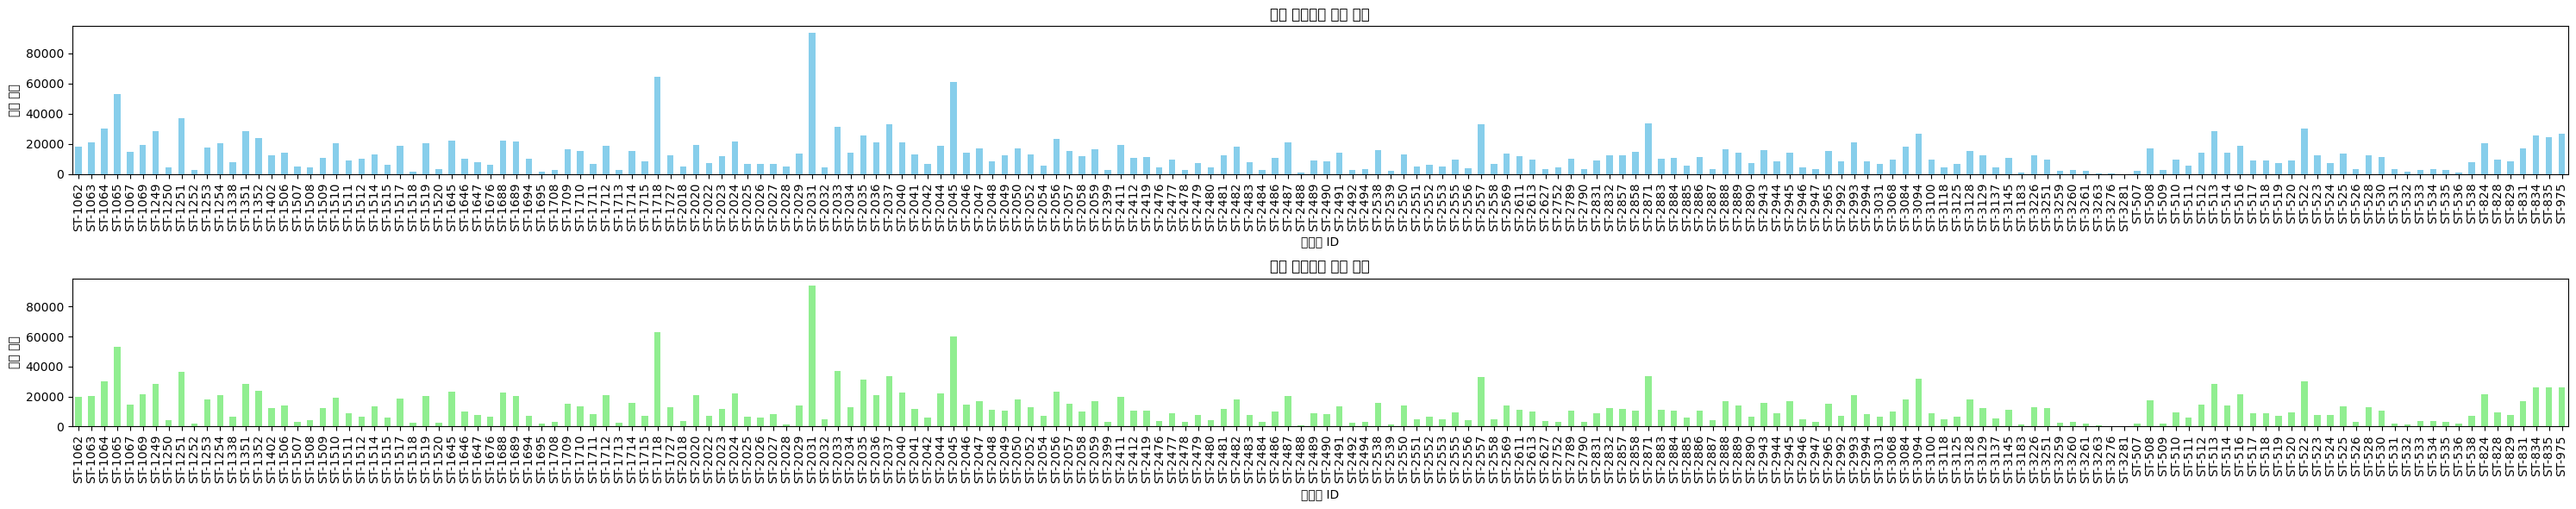

In [9]:
# 막대 그래프 그리기
plt.figure(figsize=(30, 6))

# 시작 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 1)
시작대여소별_전체횟수.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

# 종료 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 2)
종료대여소별_전체횟수.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ST-1063'),
  Text(1, 0, 'ST-1064'),
  Text(2, 0, 'ST-1065'),
  Text(3, 0, 'ST-1249'),
  Text(4, 0, 'ST-1251'),
  Text(5, 0, 'ST-1254'),
  Text(6, 0, 'ST-1351'),
  Text(7, 0, 'ST-1352'),
  Text(8, 0, 'ST-1510'),
  Text(9, 0, 'ST-1519'),
  Text(10, 0, 'ST-1645'),
  Text(11, 0, 'ST-1688'),
  Text(12, 0, 'ST-1689'),
  Text(13, 0, 'ST-1718'),
  Text(14, 0, 'ST-2024'),
  Text(15, 0, 'ST-2031'),
  Text(16, 0, 'ST-2033'),
  Text(17, 0, 'ST-2035'),
  Text(18, 0, 'ST-2036'),
  Text(19, 0, 'ST-2037'),
  Text(20, 0, 'ST-2040'),
  Text(21, 0, 'ST-2045'),
  Text(22, 0, 'ST-2056'),
  Text(23, 0, 'ST-2487'),
  Text(24, 0, 'ST-2557'),
  Text(25, 0, 'ST-2871'),
  Text(26, 0, 'ST-2993'),
  Text(27, 0, 'ST-3094'),
  Text(28, 0, 'ST-513'),
  Text(29, 0, 'ST-522'),
  Text(30, 0, 'ST-824'),
  Text(31, 0, 'ST-834'),
  Text(32, 0, 'ST-835'),
  T

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current

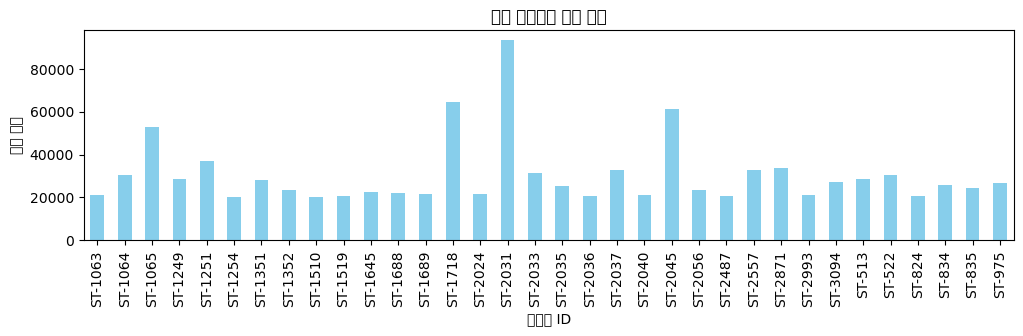

In [10]:
시작대여소_2= 시작대여소별_전체횟수[시작대여소별_전체횟수.values >= 20000]
종료대여소_2 = 종료대여소별_전체횟수[종료대여소별_전체횟수.values >= 20000]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 시작 대여소별 2만개 이상
plt.subplot(2, 1, 1)
시작대여소_2.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'ST-1063'),
  Text(1, 0, 'ST-1064'),
  Text(2, 0, 'ST-1065'),
  Text(3, 0, 'ST-1069'),
  Text(4, 0, 'ST-1249'),
  Text(5, 0, 'ST-1251'),
  Text(6, 0, 'ST-1254'),
  Text(7, 0, 'ST-1351'),
  Text(8, 0, 'ST-1352'),
  Text(9, 0, 'ST-1519'),
  Text(10, 0, 'ST-1645'),
  Text(11, 0, 'ST-1688'),
  Text(12, 0, 'ST-1689'),
  Text(13, 0, 'ST-1712'),
  Text(14, 0, 'ST-1718'),
  Text(15, 0, 'ST-2020'),
  Text(16, 0, 'ST-2024'),
  Text(17, 0, 'ST-2031'),
  Text(18, 0, 'ST-2033'),
  Text(19, 0, 'ST-2035'),
  Text(20, 0, 'ST-2036'),
  Text(21, 0, 'ST-2037'),
  Text(22, 0, 'ST-2040'),
  Text(23, 0, 'ST-2044'),
  Text(24, 0, 'ST-2045'),
  Text(25, 0, 'ST-2056'),
  Text(26, 0, 'ST-2487'),
  Text(27, 0, 'ST-2557'),
  Text(28, 0, 'ST-2871'),
  Text(29, 0, 'ST-2993'),
  Text(30, 0, 'ST-3094'),
  Text(31, 0, 'ST-513'),
 

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from curre

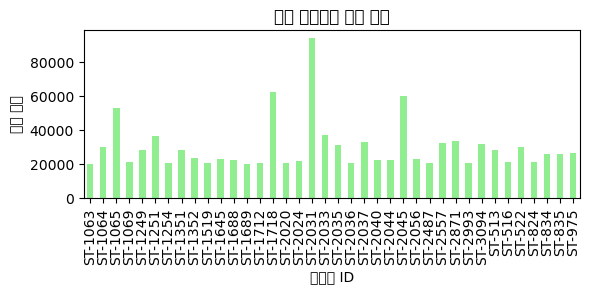

In [11]:
# 종료 대여소 2만개 이상
plt.subplot(2, 1, 2)
종료대여소_2.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)